# Team 1 - Chocolate Bar

![](https://img.newatlas.com/cocoa-tree-domestication-chocolate-1.jpg?auto=format%2Ccompress&ch=Width%2CDPR&fit=crop&h=347&q=60&rect=0%2C18%2C1620%2C911&w=616&s=2c0f902d21b734d77c99fd13171fb979)

_For more information about the dataset, read [here](https://www.kaggle.com/rtatman/chocolate-bar-ratings)._

## Your tasks
- Name your team!
- Read the source and do some quick research to understand more about the dataset and its topic
- Clean the data
- Perform Exploratory Data Analysis on the dataset
- Analyze the data more deeply and extract insights
- Visualize your analysis on Google Data Studio
- Present your works in front of the class and guests next Monday

## Submission Guide
- Create a Github repository for your project
- Upload the dataset (.csv file) and the Jupyter Notebook to your Github repository. In the Jupyter Notebook, **include the link to your Google Data Studio report**.
- Submit your works through this [Google Form](https://forms.gle/oxtXpGfS8JapVj3V8).

## Tips for Data Cleaning, Manipulation & Visualization
- Here are some of our tips for Data Cleaning, Manipulation & Visualization. [Click here](https://hackmd.io/cBNV7E6TT2WMliQC-GTw1A)

_____________________________

## Some Hints for This Dataset:
- There are lots of poorly labeled data in `Broad Bean Origin` column.
- There are some rows in `Broad Bean Origin` with multiple values, those values will create errors in our data. 
- How can we get rid of the `%` sign in `Cocoa Percent` column?
- And more...

In [66]:
# Start your codes here!
!pip install --upgrade -q gspread
!pip install gspread oauth2client
# gspread

In [0]:
from google.colab import auth
auth.authenticate_user()

import gspread 
from oauth2client.client import GoogleCredentials
from gspread_dataframe import get_as_dataframe, set_with_dataframe 


In [0]:
gc = gspread.authorize(GoogleCredentials.get_application_default()) #grant access to google drive 


In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [59]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
link = 'gdrive/My Drive/chocolate.csv'
choco_bar1= pd.read_csv(link)
choco_bar=choco_bar1

In [61]:
choco_bar.head(15)

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
5,A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela
6,A. Morin,Cuba,1315,2014,70%,France,3.50,,Cuba
7,A. Morin,Sur del Lago,1315,2014,70%,France,3.50,Criollo,Venezuela
8,A. Morin,Puerto Cabello,1319,2014,70%,France,3.75,Criollo,Venezuela
9,A. Morin,Pablino,1319,2014,70%,France,4.00,,Peru


In [0]:
choco_bar.sample(5)

,Company(Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
634,Ethel's Artisan (Mars),Red Vanilla,666,2011,62%,U.S.A.,2.75,,
484,Dandelion,Maya Mountain,1219,2014,70%,U.S.A.,3.50,Trinitario,Belize
406,"Chocolate Tree, The",Carenero Superior,1582,2015,80%,Scotland,3.75,Trinitario,Venezuela
1457,Sibu,Oscuro,1586,2015,70%,Costa Rica,3.50,,Costa Rica
1488,"Smooth Chocolator, The",Bolivia,1626,2015,72%,Australia,2.75,,Bolivia


In [0]:
choco_bar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
Company 
(Maker-if known)           1795 non-null object
Specific Bean Origin
or Bar Name    1795 non-null object
REF                                 1795 non-null int64
Review
Date                         1795 non-null int64
Cocoa
Percent                       1795 non-null object
Company
Location                    1795 non-null object
Rating                              1795 non-null float64
Bean
Type                           1794 non-null object
Broad Bean
Origin                   1794 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


In [0]:
choco_bar.isnull().sum()

Company \n(Maker-if known)           0
Specific Bean Origin\nor Bar Name    0
REF                                  0
Review\nDate                         0
Cocoa\nPercent                       0
Company\nLocation                    0
Rating                               0
Bean\nType                           1
Broad Bean\nOrigin                   1
dtype: int64

In [0]:
choco_bar.columns

Index(['Company \n(Maker-if known)', 'Specific Bean Origin\nor Bar Name',
       'REF', 'Review\nDate', 'Cocoa\nPercent', 'Company\nLocation', 'Rating',
       'Bean\nType', 'Broad Bean\nOrigin'],
      dtype='object')

In [0]:
choco_bar.columns= ['Company(Maker-if known)' ,'Specific Bean Origin or Bar Name','REF','Review Date','Cocoa Percent','Company Location','Rating','Bean Type','Broad Bean Origin']

In [0]:
choco_bar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
Company(Maker-if known)             1795 non-null object
Specific Bean Origin or Bar Name    1795 non-null object
REF                                 1795 non-null int64
Review Date                         1795 non-null int64
Cocoa Percent                       1795 non-null object
Company Location                    1795 non-null object
Rating                              1795 non-null float64
Bean Type                           1794 non-null object
Broad Bean Origin                   1794 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


In [0]:
#describe not description 
choco_bar.describe()

,REF,Review Date,Rating
count,1795.000000,1795.000000,1795.000000
mean,1035.904735,2012.325348,3.185933
std,552.886365,2.927210,0.478062
min,5.000000,2006.000000,1.000000
25%,576.000000,2010.000000,2.875000
50%,1069.000000,2013.000000,3.250000
75%,1502.000000,2015.000000,3.500000
max,1952.000000,2017.000000,5.000000


In [0]:
choco_bar['Company(Maker-if known)'].nunique() == choco_bar['Company(Maker-if known)'].count()

False

In [7]:
# clean data
# check isnull
choco_bar.isnull().sum()

Company(Maker-if known)             0
Specific Bean Origin or Bar Name    0
REF                                 0
Review Date                         0
Cocoa Percent                       0
Company Location                    0
Rating                              0
Bean Type                           1
Broad Bean Origin                   1
dtype: int64

In [0]:
# Fill the blanks
choco_bar['Bean Type'].fillna(value=' ', inplace=True)

In [0]:
# Fill the blanks
choco_bar['Broad Bean Origin'].fillna(value=' ', inplace=True)


In [9]:
choco_bar.isnull().sum()

Company(Maker-if known)             0
Specific Bean Origin or Bar Name    0
REF                                 0
Review Date                         0
Cocoa Percent                       0
Company Location                    0
Rating                              0
Bean Type                           1
Broad Bean Origin                   0
dtype: int64

In [0]:
choco_bar['Review Date'].unique()

array([2016, 2015, 2014, 2013, 2012, 2011, 2009, 2010, 2017, 2008, 2007,
       2006])

In [0]:
' '.join(["".join(x) for x in choco_bar.columns])

'Company\xa0(Maker-if known) Specific Bean Originor Bar Name REF ReviewDate CocoaPercent CompanyLocation Rating BeanType Broad BeanOrigin'

In [13]:
choco_bar['Rating'].unique()


array([3.75, 2.75, 3.  , 3.5 , 4.  , 3.25, 2.5 , 5.  , 1.75, 1.5 , 2.25,
       2.  , 1.  ])

In [45]:
# Top 5 company choco had rated >= 4.
choco_bar.sort_values(by=['Rating'],ascending=False)['Company(Maker-if known)'][:5]

78                      Amedei
86                      Amedei
222                     Bonnat
76                      Amedei
1663    Tobago Estate (Pralus)
Name: Company(Maker-if known), dtype: object

In [46]:
# 5 nguyen lieu dc dung pho bien
choco_bar['Bean Type'].value_counts()[:5]

                        887
Trinitario              419
Criollo                 153
Forastero                87
Forastero (Nacional)     52
Name: Bean Type, dtype: int64

<!-- Plot categorical data -->

Plot categorical data

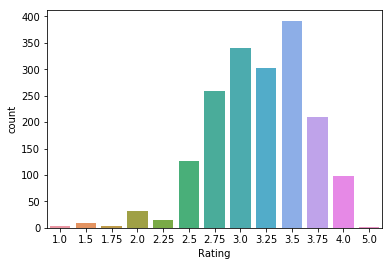

In [17]:
sns.countplot(x='Rating',data=choco_bar);
# Thanh choco được các chuyên gia đánh giá trên mức 2,5-4. nhiều, một số ít từ 1.-2.25 và rất ít đạt 5.

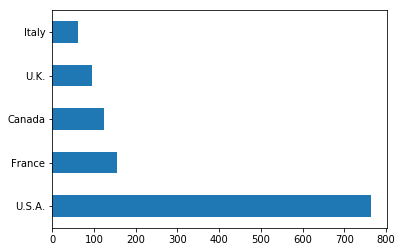

In [52]:
# company choco thuong toa lat o dau
choco_bar['Company Location'].value_counts()[:5].plot(kind='barh');

In [65]:
# ti le cocoa chiem bao nhieu %
choco_bar['Cocoa Percent'].value_counts()


70%      672
75%      222
72%      189
65%       78
80%       72
74%       50
68%       47
60%       43
73%       40
85%       36
64%       34
77%       33
71%       31
67%       27
66%       23
76%       23
100%      20
82%       17
78%       17
55%       16
62%       14
63%       12
69%       10
61%        8
58%        8
90%        8
88%        8
81%        5
84%        4
83%        4
72.5%      4
91%        3
99%        2
89%        2
56%        2
73.5%      2
60.5%      1
42%        1
46%        1
79%        1
57%        1
87%        1
50%        1
86%        1
53%        1
Name: Cocoa Percent, dtype: int64

In [30]:
choco_bar.groupby('Rating').sum()

,REF,Review Date
Rating,,
1.00,576,8028
1.50,4624,20092
1.75,1962,6032
2.00,13075,64277
2.25,16511,28184
2.50,123867,255534
2.75,281946,521276
3.00,307245,685953
3.25,360628,609993


In [0]:
# google Gpread


In [0]:
def check_exists(path):
# open the file. If exist return True
# Your code here
  try:
    sh=gc.open(path)
    return True
  except:
    return False

In [0]:
def create_new_worksheet(path='worksheet', sheets={"sheet1":""}):
    if check_exists(path):
        print('create_new_worksheet(): File exists')
        return gc.open(path)
    sh = gc.create(path)
    for name, cols in sheets.items():
        sh.add_worksheet(title=name, rows="100", cols="100")
        sh.values_update(
            name + '!A1',
            params={'valueInputOption': 'RAW'},
            body={'values': [cols]}
        )      
#     sh.del_worksheet(sh.sheet1)
#     return sh


In [0]:
sheets = {
    # Sheet name: column in this sheet
    'Chocolate_bar': choco_bar.columns.values.tolist()
}

In [75]:
choco = create_new_worksheet('Chocolate_bar',sheets)

create_new_worksheet(): File exists


In [76]:
# Push dataframe to google spreadsheet
choco.values_update(
     'Chocolate_bar!A2',
    params={'valueInputOption': 'RAW'},
    body={'values':choco_bar.fillna('').values.tolist()}
    
    
    
    
)

{'spreadsheetId': '1V9FJmPmw9beP3Djjvpx6hcPF8Lz6BCye6PlCeruPPIc',
 'updatedCells': 16155,
 'updatedColumns': 9,
 'updatedRange': 'Chocolate_bar!A2:I1796',
 'updatedRows': 1795}

In [0]:
#  Get google spreadsheet data as dataframe
df = pd.DataFrame(choco.sheet1.get_all_records()) 

In [79]:
df.head()

,Bean Type,Broad Bean Origin,Cocoa Percent,Company Location,Company(Maker-if known),REF,Rating,Review Date,Specific Bean Origin or Bar Name
0,,Sao Tome,63%,France,A. Morin,1876,3.75,2016,Agua Grande
1,,Togo,70%,France,A. Morin,1676,2.75,2015,Kpime
2,,Togo,70%,France,A. Morin,1676,3.00,2015,Atsane
3,,Togo,70%,France,A. Morin,1680,3.50,2015,Akata
4,,Peru,70%,France,A. Morin,1704,3.50,2015,Quilla
